In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer


Descripcion de los datos:

El dataset a utilizar en la elaboracion del proyecto final de la materia de Analisis Estadistico Multivariado proviene de 'https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17'.

Nuestros datos consisten en 100,000 observaciones con 17 features y una columna target.

- obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
- alpha = Right Ascension angle (at J2000 epoch)
- delta = Declination angle (at J2000 epoch)
- u = Ultraviolet filter in the photometric system
- g = Green filter in the photometric system
- r = Red filter in the photometric system
- i = Near Infrared filter in the photometric system
- z = Infrared filter in the photometric system
- run_ID = Run Number used to identify the specific scan
- rereun_ID = Rerun Number to specify how the image was processed
- cam_col = Camera column to identify the scanline within the run
- field_ID = Field number to identify each field
- spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
- class = object class (galaxy, star or quasar object) (Target)
- redshift = redshift value based on the increase in wavelength
- plate = plate ID, identifies each plate in SDSS
- MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
- fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [3]:
datos = pd.read_csv('star_classification.csv')
datos.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


<Axes: >

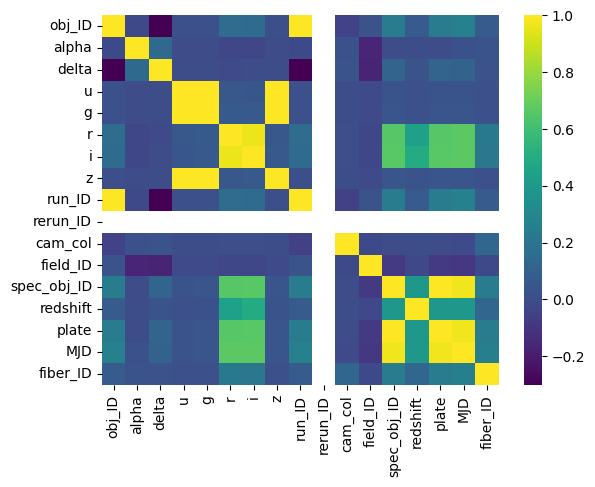

In [4]:
X = datos.drop(columns=['class'], axis=1)
Y = datos['class']

sns.heatmap(X.corr(), annot=False, fmt='.2f', cmap='viridis')

C:\Users\Josué\AppData\Local\Temp\ipykernel_76748\1094626748.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=datos, palette='pastel')


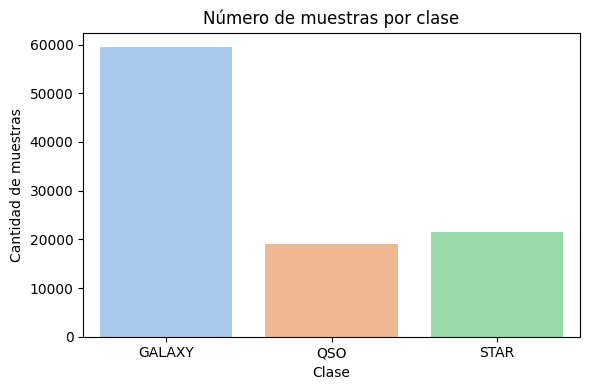

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=datos, palette='pastel')

plt.title('Número de muestras por clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de muestras')
plt.tight_layout()
plt.show()

C:\Users\Josué\AppData\Local\Temp\ipykernel_76748\3341841181.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=datos, x=var, hue='class', fill=True, common_norm=False, alpha=0.7, ax=ax, palette=palette)


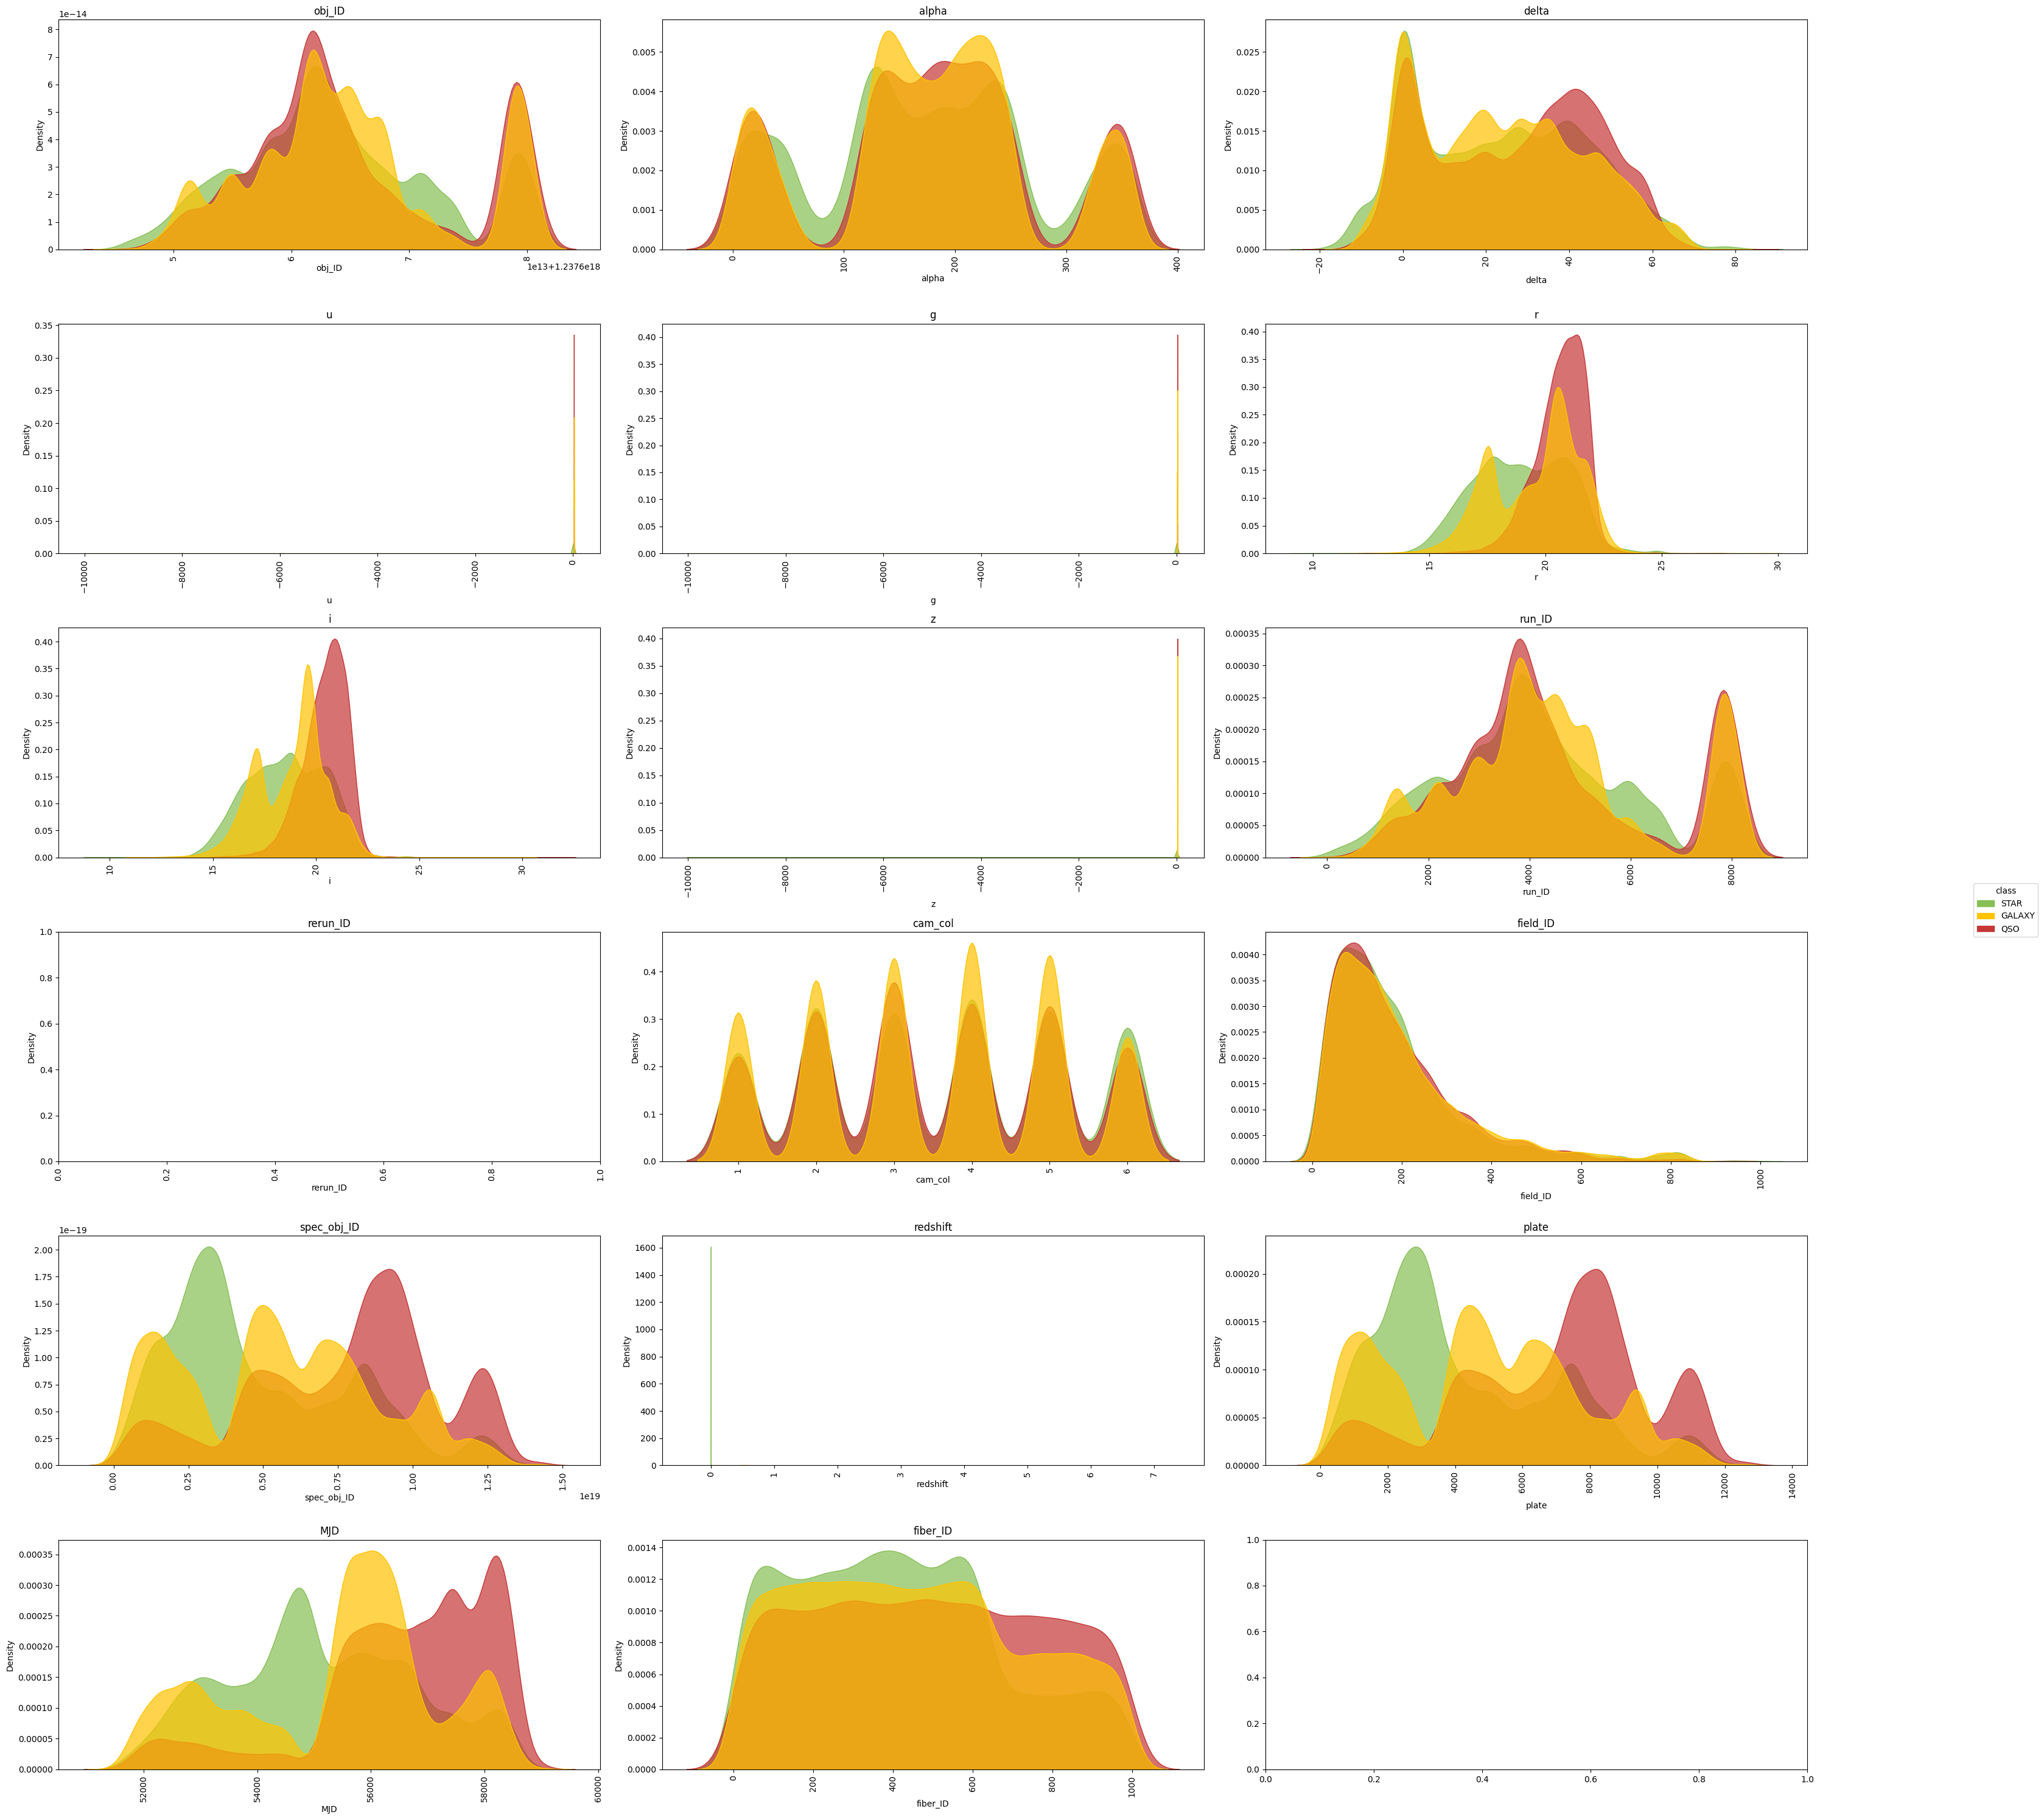

In [6]:
# Filtrar variables numéricas
numeric_vars = datos.select_dtypes(include='number').columns.tolist()

# Crear grid 6x3
fig, axes = plt.subplots(6, 3, figsize=(30, 30))
axes = axes.flatten()

# Paleta de colores
palette = {'STAR': '#86bf55', 'GALAXY': '#ffc300', 'QSO': '#c53636'}

# Gráficos
for i, var in enumerate(numeric_vars):
    ax = axes[i]
    sns.kdeplot(data=datos, x=var, hue='class', fill=True, common_norm=False, alpha=0.7, ax=ax, palette=palette)
    ax.set_title(var)
    ax.tick_params(axis='x', rotation=90)
    ax.get_legend().remove()

# Leyenda
legend_patches = [Patch(color=color, label=label) for label, color in palette.items()]
fig.legend(handles=legend_patches, title='class', loc='center right', bbox_to_anchor=(1.12, 0.5))

plt.tight_layout()
plt.show()

Planteamiento del modelado

1. Modelo RegLog Simple
2. Modelo RegLog + Feature Selection
3. Modelo RegLog + PCA
4. Modelo RegLog + Feature Selection + PCA

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [8]:
RegLog = LogisticRegression()
RegLog.fit(x_train, y_train)

LogisticRegression()

In [9]:
y_pred = RegLog.predict(x_test)

In [10]:
RegLog.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [11]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'F1-Score: {f1_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')

Accuracy: 0.60025
Precision: 0.45835863709359753


C:\Users\Josué\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1-Score: 0.478439562483232
Recall: 0.60025


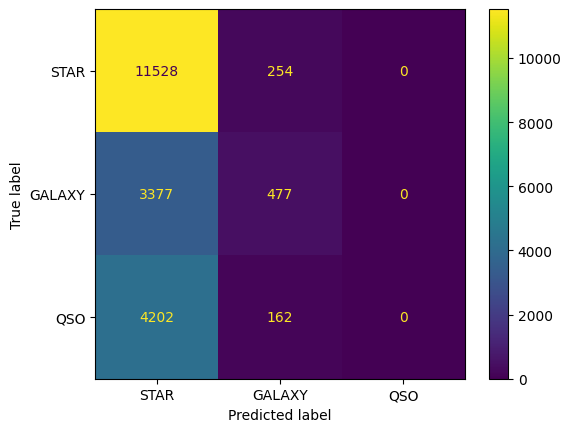

In [12]:
cmv1 = confusion_matrix(y_test, y_pred)
cmv1_display = ConfusionMatrixDisplay(cmv1, display_labels=['STAR', 'GALAXY', 'QSO'])
cmv1_display.plot()
plt.show()


PRIMER MODELO MEJORADO

In [13]:
# Separar variables (X) y la etiqueta/clase (y)
X = datos.drop(columns='class')  # Todas las columnas excepto 'class'
y = datos['class']               # Solo la columna de clase

In [14]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# 1. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 2. Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Escalar los datos después del SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Solo transformas el test, sin fit

# Ahora puedes entrenar tu modelo con X_train_scaled y y_train_resampled


In [15]:

RegLog_scaled = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0 )

In [16]:
RegLog_scaled.fit(X_train_scaled, y_train_resampled)


C:\Users\Josué\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0, penalty='elasticnet', solver='saga')

In [17]:
y_pred = RegLog_scaled.predict(X_test_scaled)
y_prob = RegLog_scaled.predict_proba(X_test_scaled)  # Probabilidad de la clase positiva

In [18]:
RegLog_scaled.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 0,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'elasticnet',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [19]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'F1-Score: {f1_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob,multi_class='ovr',average='weighted'):.4f}")

Accuracy: 0.85484
Precision: 0.8785991554342979
F1-Score: 0.8584353977135092
Recall: 0.85484
AUC-ROC: 0.9624


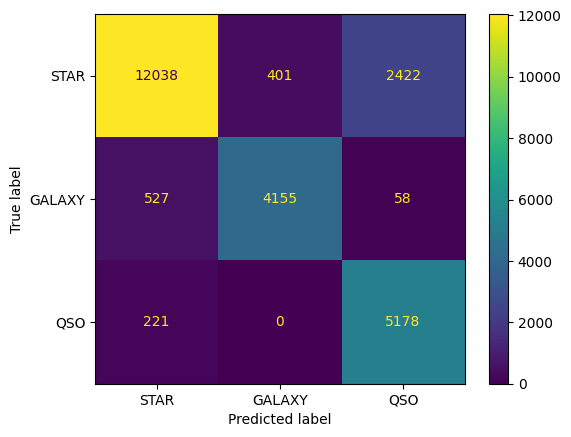

In [20]:
cmv2 = confusion_matrix(y_test, y_pred)
cmv2_display = ConfusionMatrixDisplay(cmv2, display_labels=['STAR', 'GALAXY', 'QSO'])
cmv2_display.plot()
plt.show()


SELECCION DE VARIABLES PARA EL MODELO

In [25]:
import statsmodels.api as sm

In [26]:
#%% 3. Método de Envoltura: Forward Selection (Selección hacia adelante)
def forward_selection_regression(X, y, significance_level=0.05):
    selected_features = []
    remaining_features = list(X.columns)
    
    while remaining_features:
        pvals = pd.Series(index=remaining_features, dtype=float)
        for feature in remaining_features:
            features_to_test = selected_features + [feature]
            X_with_const = sm.add_constant(X[features_to_test])
            model = sm.OLS(y, X_with_const).fit()
            pvals[feature] = model.pvalues[feature]
        min_pval = pvals.min()
        if min_pval < significance_level:
            best_feature = pvals.idxmin()
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    return selected_features

selected_forward = forward_selection_regression(X, y, significance_level=0.05)
print("\n[Envoltura - Forward] Variables seleccionadas:", selected_forward)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).